<a href="https://colab.research.google.com/github/SergioSm12/DeepLearning/blob/main/P1_T3_0_sklearn_regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios regresion logistica usando con sklearn

---



#Regresión logsitica con dataset  local 
---
dataset con la cantidad de horas de estudio para un examen vs el resultado (aprobado/reprobado)
https://github.com/luisFernandoCastellanosG/Machine_learning/blob/master/Databaset_para_trabajar_sklearn/horas_estudio_vs_aprobacion.csv





##P1.Cargando Librerías necesarias

In [ ]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)

import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)

#------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
#clase de regresión logistica disponsible en sklearn
from sklearn.linear_model import LogisticRegression
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()



```
# Esto tiene formato de código
```

##P2. cargar el dataset desde GITHUB

Cargar el dataset en un dataframe de pandas

In [ ]:
df = pd.DataFrame()
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/horas_estudio_vs_aprobacion.csv")
df.head(10)

,horas,aprueba
0,0.50,1
1,2.00,0
2,0.75,0
3,2.75,1
4,2.75,1
5,1.25,0
6,2.75,1
7,1.50,1
8,1.50,0
9,0.50,0


##P3.Conociendo los datos que tiene el dataset

In [ ]:
#primeros 5 regirstros del dataframe
#df.info()
#df.describe()
#df.head(10)
#dimensiones del dataframe
df.shape

(2000, 2)

hay datos nulos?

In [ ]:
df.isnull().sum()

horas      0
aprueba    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


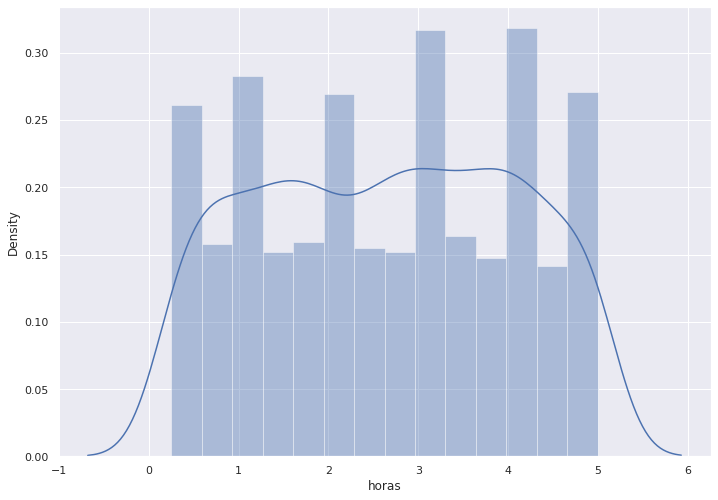

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df['horas'])                #agregamos los datos
plt.show()    

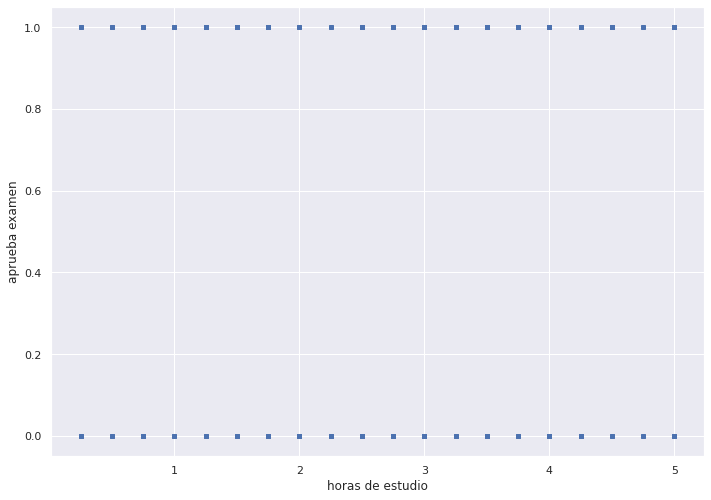

In [ ]:
X = df['horas']
y = df['aprueba']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('horas de estudio')
plt.ylabel('aprueba examen')
plt.show()

## P4.Separando los datos para el entrenamiento


In [ ]:
#En X colocaremos el tiempo de estudio que tomaron los estudiantes antes del examen
#apilamos los datos que vienen en 1d a 2d  
#opcion 1: usamos np.c_
#X = pd.DataFrame(np.c_[df['horas']], columns = ['horas'])
#opcion2: usamos .reshape(-1, 1)
X = np.array(df['horas']).reshape(-1, 1)
#En Y colocaremos el resultado del examen (1 / 0 ) (aprobado / reprobado)
y= np.array(df['aprueba'])
print(X)

[[0.5 ]
 [2.  ]
 [0.75]
 ...
 [2.75]
 [4.75]
 [4.  ]]


##P5. Entrena la regresión logística con los datos de entrenamiento


In [ ]:
#entrenando modelo de regresión logistica
regresion_logistica.fit(X,y)

LogisticRegression()

##P7.Haciendo predicciones
Tomaremos una grupo de horas y miraremos que probabilidad de pasar el examen tenemos

In [ ]:
#definimos que pasa si el estudiante estudia entre 1 a 6 horas
X_nuevo = np.array([0.5, 2.7, 10, 3.5, 9, 4]).reshape(-1,1)
#ejecutamos la predicción
prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

[0 0 1 0 1 1]


##P8. Generando probabilidades de la predicción

In [ ]:
probabilidades_prediccion = regresion_logistica.predict_proba(X_nuevo)
#la primera columna es la probabilidad de reprobar (0)
#la segunda columna es  la probabilidad de aprobar (1)
print(probabilidades_prediccion)
#si solo nos interesa la probabilidad de aprobar
print(probabilidades_prediccion[:,1])

[[0.51339844 0.48660156]
 [0.50377144 0.49622856]
 [0.47184678 0.52815322]
 [0.50026965 0.49973035]
 [0.47621227 0.52378773]
 [0.49808099 0.50191901]]
[0.48660156 0.49622856 0.52815322 0.49973035 0.52378773 0.50191901]


#El Mismo estudio pero teniendo en cuenta horas de tutorias

---

Vuelven a hacer otro estudio y adicionan las horas de tutoría que toma cada estudiante en el mes, con ello quieren predecir que probabilidades tiene de pasar el examen

##P1.Cargando Librerías necesarias

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#-------------------------------
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##P2. usar el dataset publicado en GITHUB

In [ ]:
df = pd.DataFrame()
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/horas_estudio_tutorias_vs_aprobacion.csv", encoding='utf-8')

##P3. Conociendo los datos

In [ ]:
#primeros 5 registros del dataframe
df.head()

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
0,7,27,1
1,2,43,0
2,7,26,1
3,8,29,1
4,3,42,0


In [ ]:
#dimensiones del dataframe
print("matrix df [MxN] ->"+str(df.shape))
#verificamos que no hayan nulos
print("---Columnas con valores nulos--")
print(df.isnull().sum())

matrix df [MxN] ->(2000, 2)
---Columnas con valores nulos--
horas      0
aprueba    0
dtype: int64


In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df['tutorias_mes'])                #agregamos los datos
plt.show()    

KeyError: ignored

##P4.Separando los datos para el entrenamiento

---

separaremos las características y etiquetamos como **X** e **Y** respectivamente. 


*   la variable X (horas_autoestudio_diario +	tutorias_mes)
*   la varible Y (aprobo_perdio)

In [ ]:
# eliminar la columna "aprobo_perdio" del dataframe
x = df.drop('aprobo_perdio',axis = 1)
y = df.aprobo_perdio

Dividiremos los datos en conjuntos de **train** y **test**. Esto separará 25%(! valor predeterminado) de los datos en un subconjunto para la parte de prueba y el 75% restante se usará para nuestro subconjunto de entrenamiento.

In [ ]:
#separamos los datos 25%(test) y 75%(train)
#x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)
#Si deseamos cambiar la proporción solo debemos agregar la variable test_size=0.x 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.3)

##P5. importamos la clase LogisticRegresion de scikit-learn

In [ ]:
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

##P6. Entrena la regresión logística con los datos de entrenamiento

In [ ]:
#entrenando modelo de regresión logistica
regresion_logistica.fit(x,y)

LogisticRegression()

##P7.Haciendo predicciones

In [ ]:
#usaremos el 20% de los datos para probar el modelo
#ejecutamos la predicción con datos de prueba (x_test)
y_prediccion = regresion_logistica.predict(x_test)

##P8. Generando probabilidades de la predicción

In [ ]:
#comparamos los datos de predicción (y_prediccion) VS los datos de prueba (y_test)
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print("exactitud_percentaje= "+str(100 * exactitud))

exactitud_percentaje= 97.66666666666667


probemos con datos manuales para probar el modelo

In [ ]:
#hagamos prediccion con datos manuales: 
#              [horas_estudio , horas_tutoria]
#1-estudiante: [ 4            , 38 ]
#2-estudiante: [ 8            , 29 ]
#3-estudiante: [ 1            , 1  ]
alumnos=np.array([[0, 0], [1, 1], [2, 2],[5, 2],[10 ,20]])
x_nuevo = pd.DataFrame(alumnos,columns = ['horas_autoestudio_diario','tutorias_mes'])
y_prediccion = regresion_logistica.predict(x_nuevo)
print(y_prediccion)

[1 1 1 1 1]
